In [26]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
!pip install spotipy

     ------------------------------------ 240.3/240.3 kB 408.7 kB/s eta 0:00:00


In [2]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
client_id = 'd8be190fad38497ea276a71297ab889d' #insert your client id
client_secret = '1af18cf8a81c44ad9bef49d34032cb46' # insert your client secret id here

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='https://open.spotify.com/playlist/37i9dQZF1DWVIzZt2GAU4X?si=235019f9e751409b' #insert your playlist id
results = sp.playlist(playlist_id)

print(results)

{'collaborative': False, 'description': 'Vocals and keys, front and center. Cover: Adele', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWVIzZt2GAU4X'}, 'followers': {'href': None, 'total': 1697919}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWVIzZt2GAU4X?additional_types=track', 'id': '37i9dQZF1DWVIzZt2GAU4X', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f0000000394bc9666fa5fcb6f31b1cde8', 'width': None}], 'name': 'Piano Ballads', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': '#ffffff', 'public': True, 'snapshot_id': 'MCwxYjhiODY3NjFhY2VhYWViMjVhOGUzMzU4MTY0MWQwY2RjZDY4ZGM4', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWVIzZt2GAU4X/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '20

# converting json file to dataframe

In [6]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
print(ids)

['0gplL1WMoJ6iYaPgMCL0gX', '5FKnuwsKf7YFpmhA5Wnl0q', '4R2kfaDFhslZEMJqAFNpdd', '3oUam1JxcuLVFKaAr5MWnN', '74iZuPGwyL33VlTr6jTnab', '0nJW01T7XtvILxQgC5J7Wh', '6lanRgr6wXibZr8KgzXxBl', '75JFxkI2RXiU7L9VXzMkle', '0ll8uFnc0nANY35E0Lfxvg', '3U4isOIWM3VvDubwSI3y7a', '1mXVgsBdtIVeCLJnSnmtdV', '5Ohxk2dO5COHF1krpoPigN', '0BCPKOYdS2jbQ8iyB56Zns', '73CMRj62VK8nUS4ezD2wvi', '4Of7rzpRpV1mWRbhp5rAqG', '0sY6ZUTh4yoctD8VIXz339', '3XVBdLihbNbxUwZosxcGuJ', '55Am8neGJkdj2ADaM3aw5H', '5Nm9ERjJZ5oyfXZTECKmRt', '2BOqDYLOJBiMOXShCV1neZ', '5fVZC9GiM4e8vu99W0Xf6J', '3gdPwk2wyOXNRnTA1KXnEr', '5hnGrTBaEsdukpDF6aZg8a', '1zwMYTA5nlNjZxYrvBB2pV', '3FAclTFfvUuQYnEsptbK8w', '2hKdd3qO7cWr2Jo0Bcs0MA', '4pvb0WLRcMtbPGmtejJJ6y', '4w1lzcaoZ1IC2K5TwjalRP', '7dZ1Odmx9jWIweQSatnRqo', '7vRriwrloYVaoAe3a9wJHe', '6v0UJD4a2FtleHeSYVX02A', '4JehYebiI9JE8sR8MisGVb', '0mUyMawtxj1CJ76kn9gIZK', '1veHwv1HPwzOvlhs5jPxeP', '1is8gU4RVcN4J8xItxWoOY', '4UzVcXufOhGUwF56HT7b8M', '1M2nd8jNUkkwrc1dgBPTJz', '6yIHGmQLJxWAUZ1ZkENemN', '4E6cwWJWZw

In [7]:
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

    
print(song_meta)

{'id': ['0gplL1WMoJ6iYaPgMCL0gX', '5FKnuwsKf7YFpmhA5Wnl0q', '4R2kfaDFhslZEMJqAFNpdd', '3oUam1JxcuLVFKaAr5MWnN', '74iZuPGwyL33VlTr6jTnab', '0nJW01T7XtvILxQgC5J7Wh', '6lanRgr6wXibZr8KgzXxBl', '75JFxkI2RXiU7L9VXzMkle', '0ll8uFnc0nANY35E0Lfxvg', '3U4isOIWM3VvDubwSI3y7a', '1mXVgsBdtIVeCLJnSnmtdV', '5Ohxk2dO5COHF1krpoPigN', '0BCPKOYdS2jbQ8iyB56Zns', '73CMRj62VK8nUS4ezD2wvi', '4Of7rzpRpV1mWRbhp5rAqG', '0sY6ZUTh4yoctD8VIXz339', '3XVBdLihbNbxUwZosxcGuJ', '55Am8neGJkdj2ADaM3aw5H', '5Nm9ERjJZ5oyfXZTECKmRt', '2BOqDYLOJBiMOXShCV1neZ', '5fVZC9GiM4e8vu99W0Xf6J', '3gdPwk2wyOXNRnTA1KXnEr', '5hnGrTBaEsdukpDF6aZg8a', '1zwMYTA5nlNjZxYrvBB2pV', '3FAclTFfvUuQYnEsptbK8w', '2hKdd3qO7cWr2Jo0Bcs0MA', '4pvb0WLRcMtbPGmtejJJ6y', '4w1lzcaoZ1IC2K5TwjalRP', '7dZ1Odmx9jWIweQSatnRqo', '7vRriwrloYVaoAe3a9wJHe', '6v0UJD4a2FtleHeSYVX02A', '4JehYebiI9JE8sR8MisGVb', '0mUyMawtxj1CJ76kn9gIZK', '1veHwv1HPwzOvlhs5jPxeP', '1is8gU4RVcN4J8xItxWoOY', '4UzVcXufOhGUwF56HT7b8M', '1M2nd8jNUkkwrc1dgBPTJz', '6yIHGmQLJxWAUZ1ZkENemN', '4E6

In [8]:
song_meta_df=pd.DataFrame.from_dict(song_meta)

In [10]:
song_meta_df.head()

,id,album,name,artist,explicit,popularity
0,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Easy On Me,Adele,False,84
1,5FKnuwsKf7YFpmhA5Wnl0q,Songs from Another Love,Another Love,Tom Odell,True,66
2,4R2kfaDFhslZEMJqAFNpdd,folklore,cardigan,Taylor Swift,False,90
3,3oUam1JxcuLVFKaAr5MWnN,We Were Never Really Friends,We Were Never Really Friends,Bruno Major,False,68
4,74iZuPGwyL33VlTr6jTnab,A Star Is Born Soundtrack,Always Remember Us This Way,Lady Gaga,False,73


In [11]:
# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

In [12]:
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.604,0.366,5,-7.519,1,0.0282,0.578,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4
1,0.443,0.540,4,-8.536,0,0.0400,0.697,0.000010,0.1020,0.133,119.161,audio_features,5FKnuwsKf7YFpmhA5Wnl0q,spotify:track:5FKnuwsKf7YFpmhA5Wnl0q,https://api.spotify.com/v1/tracks/5FKnuwsKf7YF...,https://api.spotify.com/v1/audio-analysis/5FKn...,250973,4
2,0.613,0.581,0,-8.588,0,0.0424,0.537,0.000345,0.2500,0.551,130.033,audio_features,4R2kfaDFhslZEMJqAFNpdd,spotify:track:4R2kfaDFhslZEMJqAFNpdd,https://api.spotify.com/v1/tracks/4R2kfaDFhslZ...,https://api.spotify.com/v1/audio-analysis/4R2k...,239560,4
3,0.551,0.249,9,-10.343,1,0.0364,0.831,0.000046,0.0762,0.150,135.286,audio_features,3oUam1JxcuLVFKaAr5MWnN,spotify:track:3oUam1JxcuLVFKaAr5MWnN,https://api.spotify.com/v1/tracks/3oUam1JxcuLV...,https://api.spotify.com/v1/audio-analysis/3oUa...,204325,4
4,0.553,0.502,0,-5.972,1,0.0409,0.299,0.000000,0.7640,0.296,129.976,audio_features,74iZuPGwyL33VlTr6jTnab,spotify:track:74iZuPGwyL33VlTr6jTnab,https://api.spotify.com/v1/tracks/74iZuPGwyL33...,https://api.spotify.com/v1/audio-analysis/74iZ...,210200,4


In [13]:
# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

In [14]:
# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [15]:
final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Easy On Me,Adele,False,84,0.604,0.366,5,-7.519,...,0.000000,0.1330,0.130,141.981,audio_features,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,3.744917,4
1,5FKnuwsKf7YFpmhA5Wnl0q,Songs from Another Love,Another Love,Tom Odell,True,66,0.443,0.540,4,-8.536,...,0.000010,0.1020,0.133,119.161,audio_features,spotify:track:5FKnuwsKf7YFpmhA5Wnl0q,https://api.spotify.com/v1/tracks/5FKnuwsKf7YF...,https://api.spotify.com/v1/audio-analysis/5FKn...,4.182883,4
2,4R2kfaDFhslZEMJqAFNpdd,folklore,cardigan,Taylor Swift,False,90,0.613,0.581,0,-8.588,...,0.000345,0.2500,0.551,130.033,audio_features,spotify:track:4R2kfaDFhslZEMJqAFNpdd,https://api.spotify.com/v1/tracks/4R2kfaDFhslZ...,https://api.spotify.com/v1/audio-analysis/4R2k...,3.992667,4
3,3oUam1JxcuLVFKaAr5MWnN,We Were Never Really Friends,We Were Never Really Friends,Bruno Major,False,68,0.551,0.249,9,-10.343,...,0.000046,0.0762,0.150,135.286,audio_features,spotify:track:3oUam1JxcuLVFKaAr5MWnN,https://api.spotify.com/v1/tracks/3oUam1JxcuLV...,https://api.spotify.com/v1/audio-analysis/3oUa...,3.405417,4
4,74iZuPGwyL33VlTr6jTnab,A Star Is Born Soundtrack,Always Remember Us This Way,Lady Gaga,False,73,0.553,0.502,0,-5.972,...,0.000000,0.7640,0.296,129.976,audio_features,spotify:track:74iZuPGwyL33VlTr6jTnab,https://api.spotify.com/v1/tracks/74iZuPGwyL33...,https://api.spotify.com/v1/audio-analysis/74iZ...,3.503333,4


In [16]:
# Save the updated dataset to a new CSV file
final_df.to_csv('playlist1.csv', index=False)

# Data preprocessing

In [18]:
final_df.columns

Index(['id', 'album', 'name', 'artist', 'explicit', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [19]:
final_df.dtypes

id                   object
album                object
name                 object
artist               object
explicit               bool
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature        int64
dtype: object

In [20]:
#dropping unnecessary columns
final_df.drop(['id', 'key', 'track_href', 'analysis_url', 'uri'], axis=1, inplace=True)

In [21]:
# Checking the number of rows and columns in the dataset
print("Number of rows:", final_df.shape[0])
print("Number of columns:", final_df.shape[1])

Number of rows: 75
Number of columns: 18


In [22]:
print(final_df.isnull().sum())

album               0
name                0
artist              0
explicit            0
popularity          0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
dtype: int64


In [23]:
# Descriptive statistics of the numerical columns
print(final_df.describe())

       popularity  danceability     energy   loudness       mode  speechiness  \
count   75.000000     75.000000  75.000000  75.000000  75.000000    75.000000   
mean    76.533333      0.495667   0.416303  -8.106973   0.733333     0.046320   
std      5.500205      0.126910   0.201343   3.025520   0.445195     0.041343   
min     66.000000      0.149000   0.048500 -17.212000   0.000000     0.024300   
25%     73.000000      0.408500   0.266000  -9.249500   0.000000     0.030950   
50%     75.000000      0.492000   0.407000  -7.830000   1.000000     0.036400   
75%     81.000000      0.601000   0.566500  -5.938000   1.000000     0.041350   
max     90.000000      0.736000   0.936000  -3.142000   1.000000     0.300000   

       acousticness  instrumentalness   liveness    valence       tempo  \
count     75.000000         75.000000  75.000000  75.000000   75.000000   
mean       0.599669          0.002814   0.138129   0.277265  116.705893   
std        0.307669          0.021028   0.106

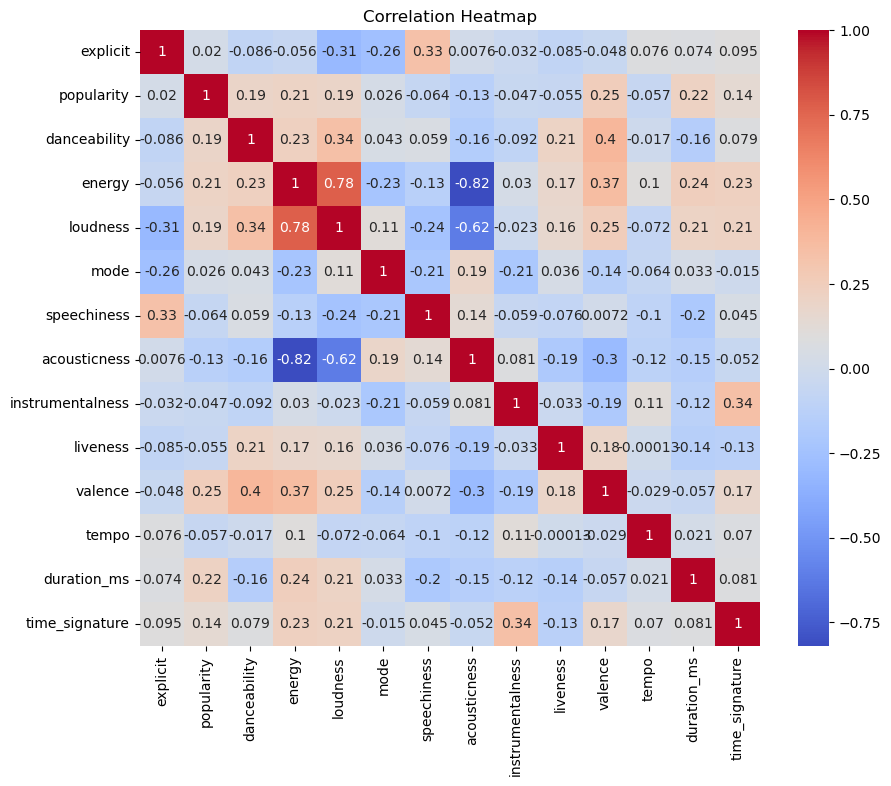

In [28]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = final_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

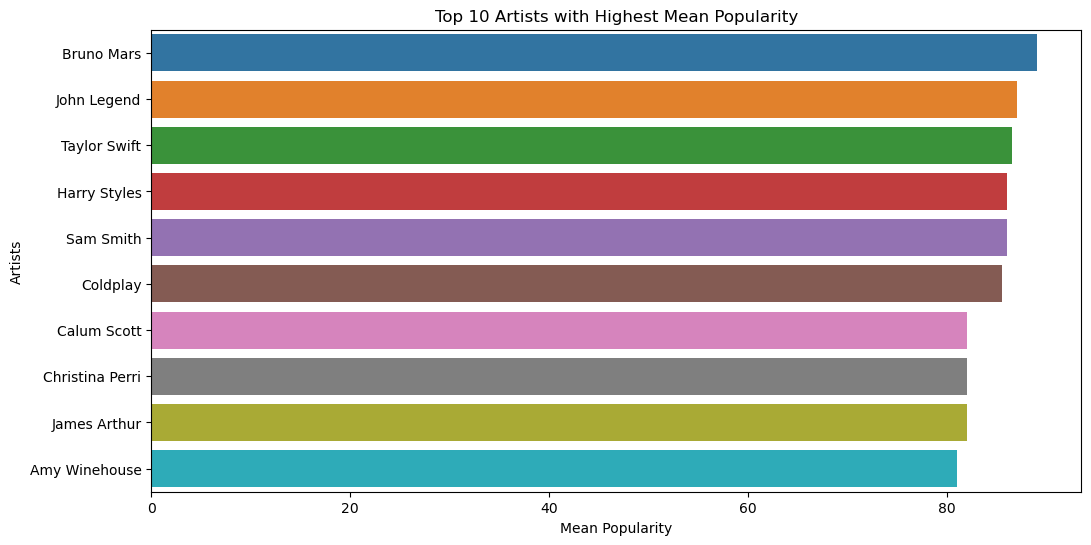

In [31]:
# Bar Plot of Artists with Top 10 Popularity
top10_artists = final_df.groupby('artist')['popularity'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_artists.values, y=top10_artists.index, orient='h')
plt.xlabel('Mean Popularity')
plt.ylabel('Artists')
plt.title('Top 10 Artists with Highest Mean Popularity')
plt.show()

In [37]:
columns2=features_df[['danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [38]:
#normalizing the columns to range between 0 and 1

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
columns2.loc[:]=min_max_scaler.fit_transform(columns2.loc[:])

C:\Users\terre\AppData\Local\Temp\ipykernel_11056\3622294686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns2.loc[:]=min_max_scaler.fit_transform(columns2.loc[:])


# Making a radar chart


In [45]:
import math

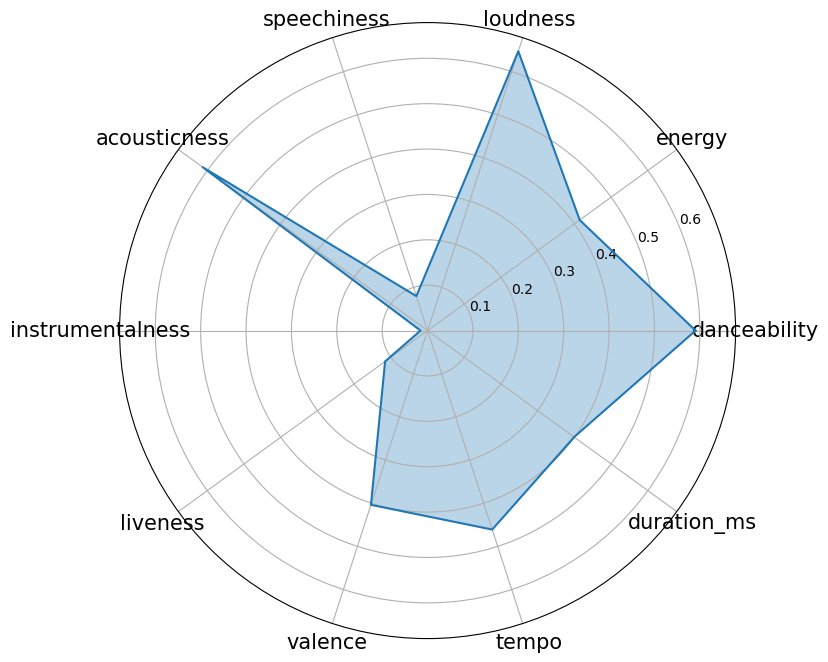

In [55]:

# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(columns2.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(columns2.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2* math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
# Save the chart to a file
plt.savefig('chart1.png') 

# Conclusion

this radar chart shows that for this playlist that i worked on;

this playlist is averagebly danceable, the rate of energy shows the track consists of mostly rnb genre, the rate of instrumentalness rate shows a very low rate of spoken words which goes to say that the track is not a rap or audiobook playlist.